In [32]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# Define data
df = np.array([
    [7.5, 20, 16.5, 77.89],
    [120, 10, 25, 91.41],
    [285, 20, 16.5, 96.03],
    [285, 20, 2.2, 93.67],
    [450, 10, 8, 95.72],
    [285, 20, 16.5, 95.41],
    [120, 30, 8, 82.98],
    [285, 3.2, 16.5, 94.84],
    [285, 20, 30.8, 97.56],
    [450, 30, 25, 91.94],
    [450, 30, 8, 96.2],
    [120, 10, 8, 83.06],
    [285, 37, 16.5, 96.84],
    [450, 10, 25, 92.26],
    [560, 20, 16.5, 81.32],
    [285, 20, 16.5, 95.8],
    [120, 30, 25, 95.06],
    [427.81, 8.26, 2.49, 96.64],
    [59.93, 15.84, 20.13, 81.84],
    [530.7, 17.54, 2.69, 96.05],
    [228.4, 7.31, 2.44, 85.18],
    [156.8, 3.62, 3.69, 79.61]
])

In [54]:
df=pd.DataFrame(df,columns=['TOC',"NH4+","PO43-","TC removal efficiency"])

In [55]:
df.head(5)

,TOC,NH4+,PO43-,TC removal efficiency
0,7.5,20.0,16.5,77.89
1,120.0,10.0,25.0,91.41
2,285.0,20.0,16.5,96.03
3,285.0,20.0,2.2,93.67
4,450.0,10.0,8.0,95.72


In [56]:
df.describe()

,TOC,NH4+,PO43-,TC removal efficiency
count,22.000000,22.000000,22.000000,22.000000
mean,283.915455,17.853182,14.179091,90.786818
std,157.580495,9.412178,8.811322,6.661920
min,7.500000,3.200000,2.200000,77.890000
25%,129.200000,10.000000,8.000000,83.590000
50%,285.000000,20.000000,16.500000,94.255000
75%,444.452500,20.000000,19.222500,95.972500
max,560.000000,37.000000,30.800000,97.560000


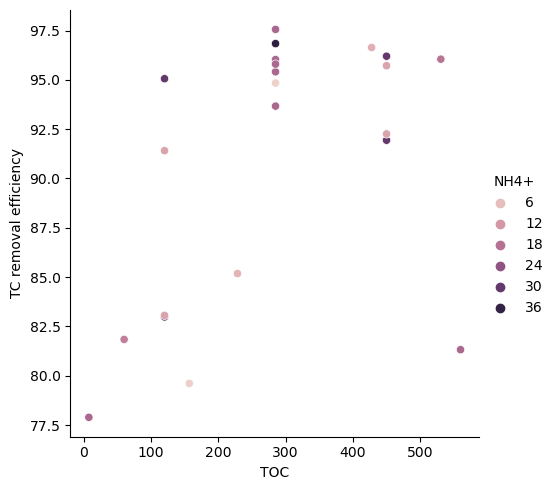

In [16]:
sns.relplot(x="TOC", y="TC removal efficiency", hue="NH4+", data=df)

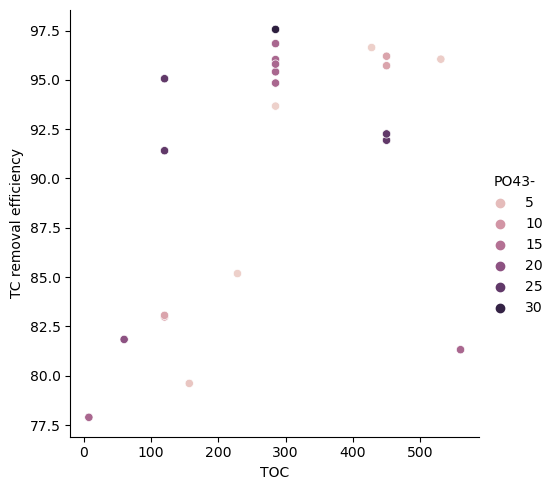

In [17]:
sns.relplot(x="TOC", y="TC removal efficiency", hue="PO43-", data=df)

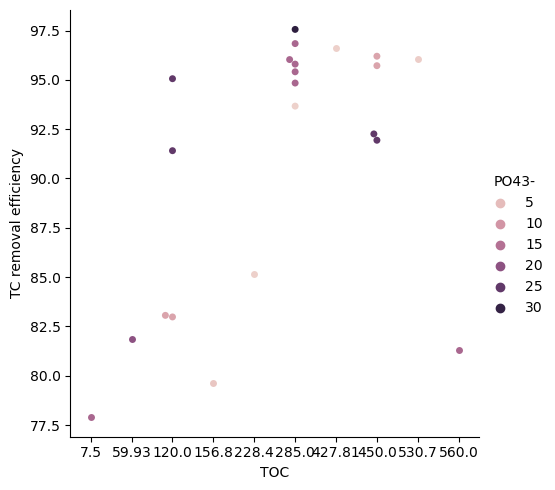

In [19]:
sns.catplot(x="TOC", y="TC removal efficiency", hue="PO43-", kind="swarm",data=df)

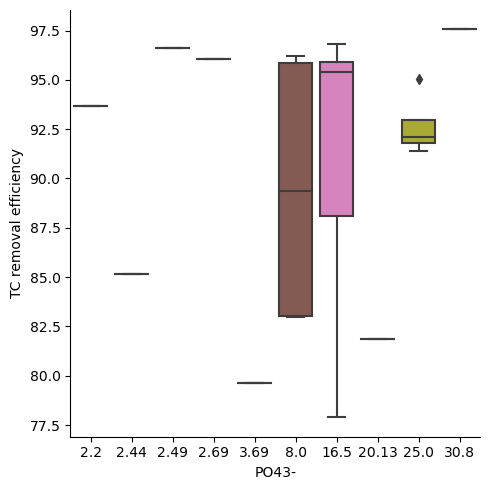

In [21]:
sns.catplot(x="PO43-", y="TC removal efficiency", kind="box", data=df)

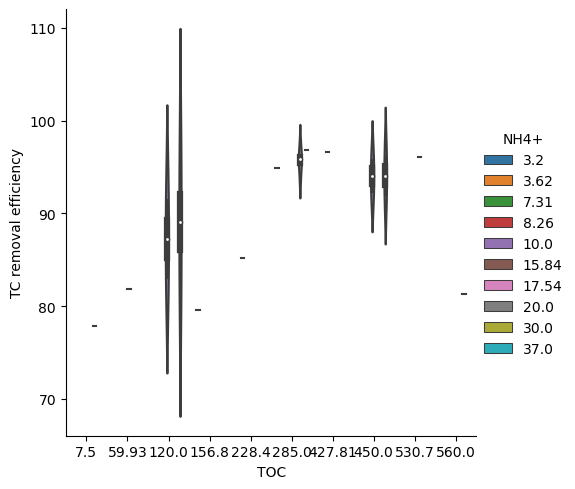

In [23]:
sns.catplot(x="TOC", y="TC removal efficiency", hue="NH4+", kind="violin" , data=df)

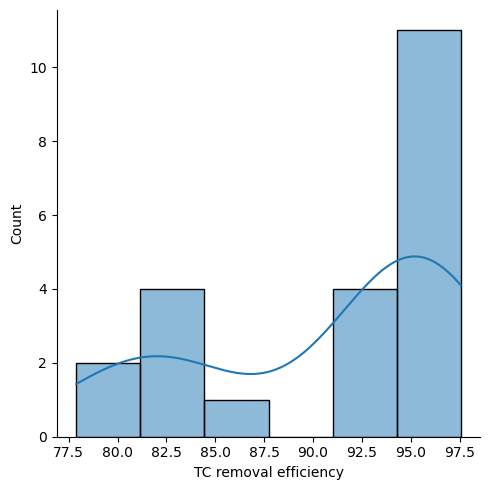

In [24]:
sns.displot(df['TC removal efficiency'], kde=True)

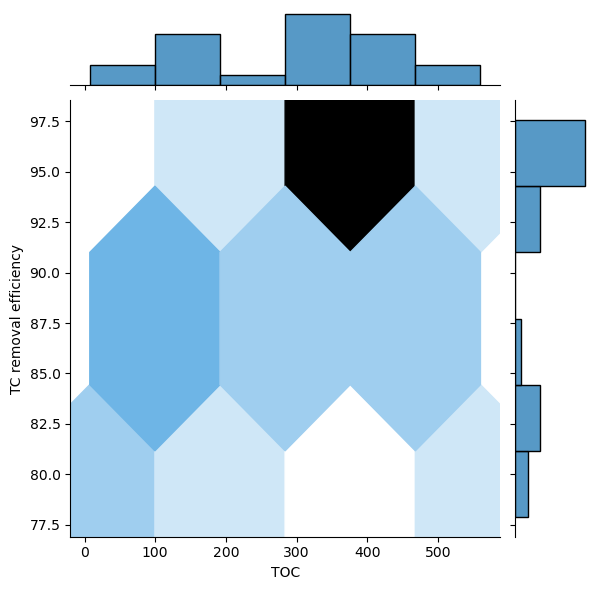

In [26]:
sns.jointplot(x="TOC", y="TC removal efficiency",kind="hex", data=df)

<Axes: >

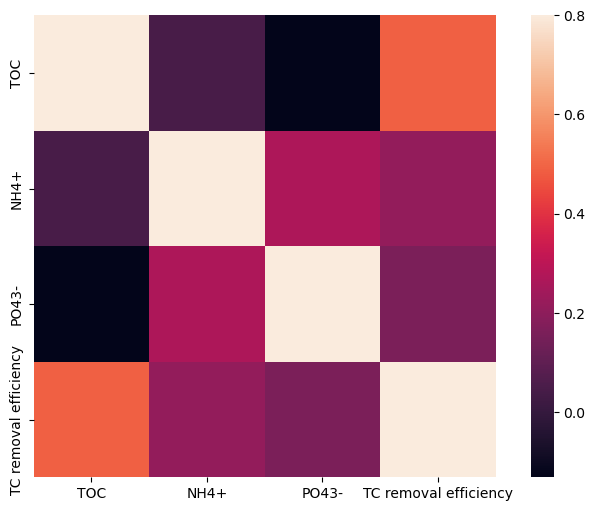

In [29]:
corrmat=df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corrmat, vmax=.8 , square=True)

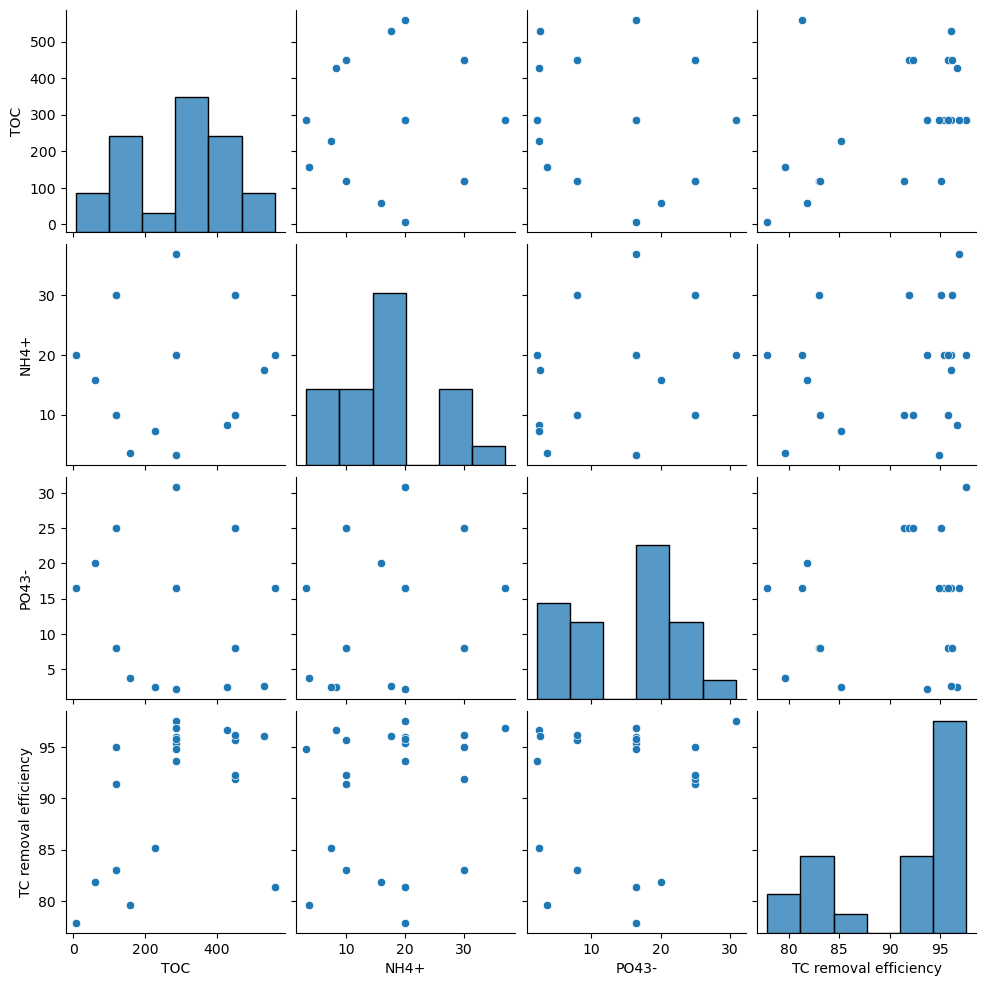

In [30]:
sns.pairplot(df)

In [14]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [9]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3)

In [10]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 11s]
val_mean_absolute_error: 64.5181032816569

Best val_mean_absolute_error So Far: 41.363608042399086
Total elapsed time: 00h 01m 27s
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 16
units_0: 512
units_1: 192
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 41.363608042399086

Trial 1 summary
Hyperparameters:
num_layers: 9
units_0: 480
units_1: 224
learning_rate: 0.001
units_2: 416
units_3: 416
units_4: 32
units_5: 512
units_6: 64
units_7: 64
units_8: 64
units_9: 128
units_10: 160
units_11: 192
units_12: 384
units_13: 64
units_14: 64
units_15: 128
Score: 52.29369862874349

Trial 2 summary
Hyperparameters:
num_layers: 18
units_0: 224
units_1: 64
learning_rate: 0.01
units_2: 160
units_3: 192
units_4: 256
units_5: 480
units_6: 512
units_7: 256
units_8: 448
units_9: 320
units_10: 32
units_11: 64
units_12: 416
units_13: 128
units_14: 192
units_15: